In [28]:
import numpy as np
import astropy
from itertools import izip
from pearce.mocks import compute_prim_haloprop_bins, cat_dict
from pearce.mocks.customHODModels import *
from halotools.utils.table_utils import compute_conditional_percentiles

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [30]:
rp_bins = np.logspace(-1,1.6,18)
bin_centers = (rp_bins[:1]+rp_bins[:-1])/2

In [31]:
shuffle_type = 'sh_shuffled'
mag_type = 'vpeak'

In [32]:
%%bash
ls *xi*.npy

mock_xi.npy
mock_xi_ab.npy
mock_xi_ab_alpha_05.npy
mock_xi_ab_vpeak.npy
mock_xi_ab_vpeak_1h.npy
mock_xi_ab_vpeak_2h.npy
mock_xi_ab_vvir.npy
mock_xi_alpha_05.npy
mock_xi_max_ab.npy
mock_xi_max_ab2_vpeak.npy
mock_xi_max_ab_alpha_05.npy
mock_xi_max_ab_vpeak.npy
mock_xi_max_ab_vpeak_1h.npy
mock_xi_max_ab_vpeak_2h.npy
mock_xi_max_ab_vvir.npy
mock_xi_max_cen_ab_vpeak.npy
mock_xi_max_cen_ab_vpeak_1h.npy
mock_xi_max_cen_ab_vpeak_2h.npy
mock_xi_max_sat_ab_vpeak.npy
mock_xi_max_sat_ab_vpeak_1h.npy
mock_xi_max_sat_ab_vpeak_2h.npy
mock_xi_vpeak.npy
mock_xi_vpeak_1h.npy
mock_xi_vpeak_2h.npy
mock_xi_vvir.npy
sham_nfw_xi.npy
sham_nfw_xi_alpha_05.npy
sham_nfw_xi_vpeak.npy
sham_nfw_xi_vpeak_1h.npy
sham_nfw_xi_vpeak_2h.npy
sham_nfw_xi_vvir.npy
sham_sh_shuffle_cen_xi_vpeak.npy
sham_sh_shuffle_cen_xi_vpeak_1h.npy
sham_sh_shuffle_cen_xi_vpeak_2h.npy
sham_sh_shuffle_sat_xi_vpeak.npy
sham_sh_shuffle_sat_xi_vpeak_1h.npy
sham_sh_shuffle_sat_xi_vpeak_2h.npy
sham_sh_shuffle_xi_vpeak.npy
sham_sh_shuffle_xi_vpeak_

In [33]:
sham_wp = np.loadtxt('sham_xi_%s.npy'%mag_type)

In [34]:
sham_wp_1h = np.loadtxt('sham_xi_%s_1h.npy'%mag_type)
sham_wp_2h = np.loadtxt('sham_xi_%s_2h.npy'%mag_type)

In [35]:
sham_nfw_wp = np.loadtxt('sham_nfw_xi_%s.npy'%mag_type)

In [36]:
sham_nfw_wp_1h = np.loadtxt('sham_nfw_xi_%s_1h.npy'%mag_type)
sham_nfw_wp_2h = np.loadtxt('sham_nfw_xi_%s_2h.npy'%mag_type)

In [37]:
sham_shuffled_wp = np.loadtxt('sham_shuffle_xi_%s.npy'%(mag_type))
sham_sh_shuffled_wp = np.loadtxt('sham_sh_shuffle_xi_%s.npy'%(mag_type))

In [38]:
sham_shuffled_wp_1h = np.loadtxt('sham_shuffle_xi_%s_1h.npy'%(mag_type))
sham_shuffled_wp_2h = np.loadtxt('sham_shuffle_xi_%s_2h.npy'%(mag_type))

sham_sh_shuffled_wp_1h = np.loadtxt('sham_sh_shuffle_xi_%s_1h.npy'%(mag_type))
sham_sh_shuffled_wp_2h = np.loadtxt('sham_sh_shuffle_xi_%s_2h.npy'%(mag_type))

In [39]:
sham_sh_shuffled_cen_wp = np.loadtxt('sham_sh_shuffle_cen_xi_%s.npy'%(mag_type))
sham_sh_shuffled_sat_wp = np.loadtxt('sham_sh_shuffle_sat_xi_%s.npy'%(mag_type))

sham_sh_shuffled_cen_wp_1h = np.loadtxt('sham_sh_shuffle_cen_xi_%s_1h.npy'%(mag_type))
sham_sh_shuffled_cen_wp_2h = np.loadtxt('sham_sh_shuffle_cen_xi_%s_2h.npy'%(mag_type))
sham_sh_shuffled_sat_wp_1h = np.loadtxt('sham_sh_shuffle_sat_xi_%s_1h.npy'%(mag_type))
sham_sh_shuffled_sat_wp_2h = np.loadtxt('sham_sh_shuffle_sat_xi_%s_2h.npy'%(mag_type))

In [40]:
mock_wp = np.loadtxt('mock_xi_%s.npy'%mag_type)
mock_wp_ab = np.loadtxt('mock_xi_ab_%s.npy'%mag_type)
mock_wp_max_ab = np.loadtxt('mock_xi_max_ab_%s.npy'%mag_type)
mock_wp_max_cen_ab = np.loadtxt('mock_xi_max_cen_ab_%s.npy'%mag_type)
mock_wp_max_sat_ab = np.loadtxt('mock_xi_max_sat_ab_%s.npy'%mag_type)
#wp_errs = np.loadtxt('xi_errs.npy')

In [41]:
mock_wp_1h = np.loadtxt('mock_xi_%s_1h.npy'%mag_type)
mock_wp_ab_1h = np.loadtxt('mock_xi_ab_%s_1h.npy'%mag_type)
mock_wp_max_ab_1h = np.loadtxt('mock_xi_max_ab_%s_1h.npy'%mag_type)
mock_wp_max_cen_ab_1h = np.loadtxt('mock_xi_max_cen_ab_%s_1h.npy'%mag_type)
mock_wp_max_sat_ab_1h = np.loadtxt('mock_xi_max_sat_ab_%s_1h.npy'%mag_type)
#wp_errs = np.loadtxt('xi_errs.npy')

mock_wp_2h = np.loadtxt('mock_xi_%s_2h.npy'%mag_type)
mock_wp_ab_2h = np.loadtxt('mock_xi_ab_%s_2h.npy'%mag_type)
mock_wp_max_ab_2h = np.loadtxt('mock_xi_max_ab_%s_2h.npy'%mag_type)
mock_wp_max_cen_ab_2h = np.loadtxt('mock_xi_max_cen_ab_%s_2h.npy'%mag_type)
mock_wp_max_sat_ab_2h = np.loadtxt('mock_xi_max_sat_ab_%s_2h.npy'%mag_type)

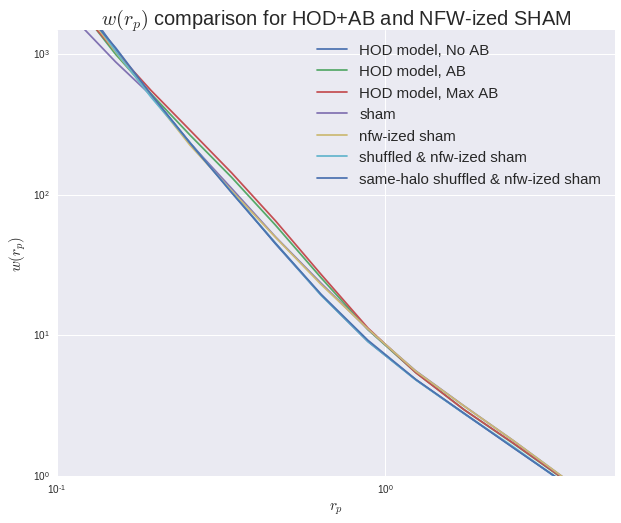

In [42]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab, label = 'HOD model, AB')
plt.plot(bin_centers, mock_wp_max_ab, label = 'HOD model, Max AB')
plt.plot(bin_centers, sham_wp, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_shuffled_wp, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp, label = 'same-halo shuffled & nfw-ized sham')

plt.loglog()
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 5e0]);
plt.ylim([1,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$w(r_p)$',fontsize = 15)
plt.title(r'$w(r_p)$ comparison for HOD+AB and NFW-ized SHAM', fontsize = 20)

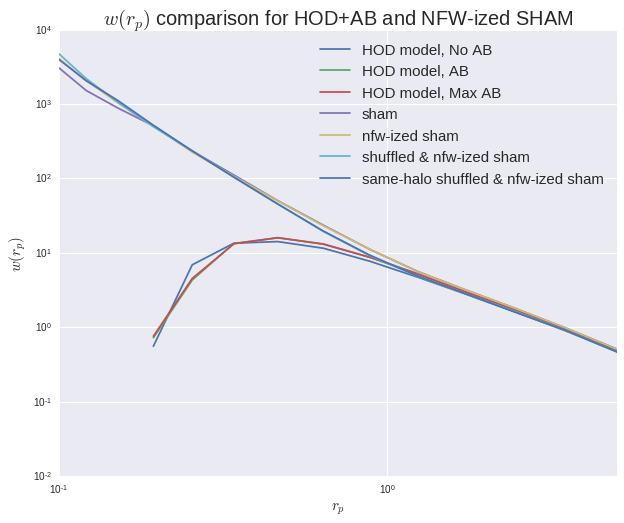

In [43]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp_2h, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab_2h, label = 'HOD model, AB')
plt.plot(bin_centers, mock_wp_max_ab_2h, label = 'HOD model, Max AB')
plt.plot(bin_centers, sham_wp_2h, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp_2h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_shuffled_wp_2h, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_2h, label = 'same-halo shuffled & nfw-ized sham')

plt.loglog()
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 5e0]);
#plt.ylim([1,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$w(r_p)$',fontsize = 15)
plt.title(r'$w(r_p)$ comparison for HOD+AB and NFW-ized SHAM', fontsize = 20)

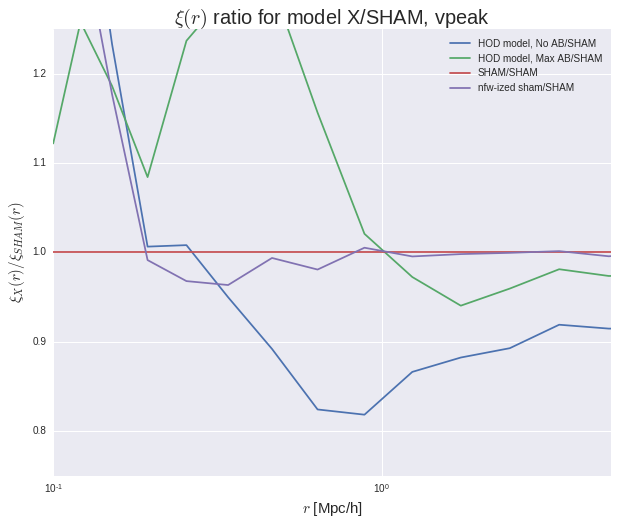

In [47]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp/sham_wp, label = 'HOD model, No AB/SHAM')
#plt.plot(bin_centers, mock_wp_ab/sham_wp, label = 'HOD model, AB/SHAM')
plt.plot(bin_centers, mock_wp_max_ab/sham_wp, label = 'HOD model, Max AB/SHAM')
plt.plot(bin_centers, sham_wp/sham_wp, label = 'SHAM/SHAM')
plt.plot(bin_centers, sham_nfw_wp/sham_wp, label = 'nfw-ized sham/SHAM')
#plt.plot(bin_centers, sham_shuffled_wp/sham_wp, label = 'shuffled & nfw-ized sham/SHAM')
#plt.plot(bin_centers, sham_sh_shuffled_wp/sham_wp, label = 'same-halo shuffled & nfw-ized sham/SHAM')

plt.xscale('log')
plt.legend(loc='best')
plt.xlim([1e-1, 5e0]);
plt.ylim([0.75,1.25]);
plt.xlabel(r'$r$ [Mpc/h]',fontsize = 15)
plt.ylabel(r'$\xi_{X} (r)/\xi_{SHAM} (r)$',fontsize = 15)
plt.title(r'$\xi (r)$ ratio for model X/SHAM, %s'%mag_type, fontsize = 20)

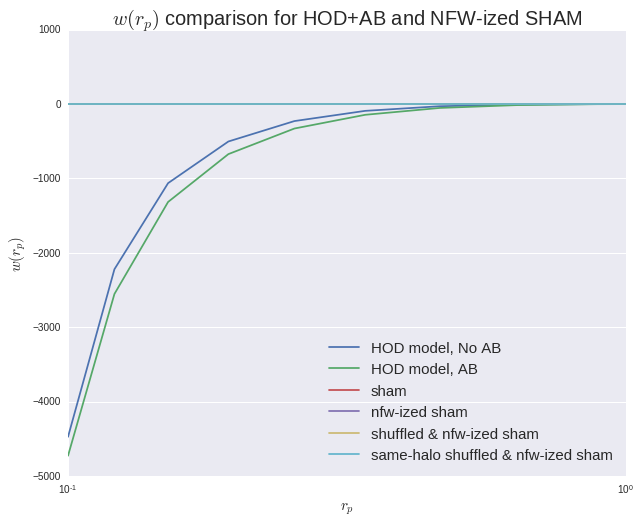

In [18]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp_1h/sham_wp_1h, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab_1h/sham_wp_1h, label = 'HOD model, AB')
#plt.plot(bin_centers, mock_wp_max_ab_1hsham_wp_1h, label = 'HOD model, Max AB')
plt.plot(bin_centers, sham_wp_1h/sham_wp_1h, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp_1h/sham_wp_1h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_shuffled_wp_1h/sham_wp_1h, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_1h/sham_wp_1h, label = 'same-halo shuffled & nfw-ized sham')

#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 1e0]);
#plt.ylim([1,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$w(r_p)$',fontsize = 15)
plt.title(r'$w(r_p)$ comparison for HOD+AB and NFW-ized SHAM', fontsize = 20)

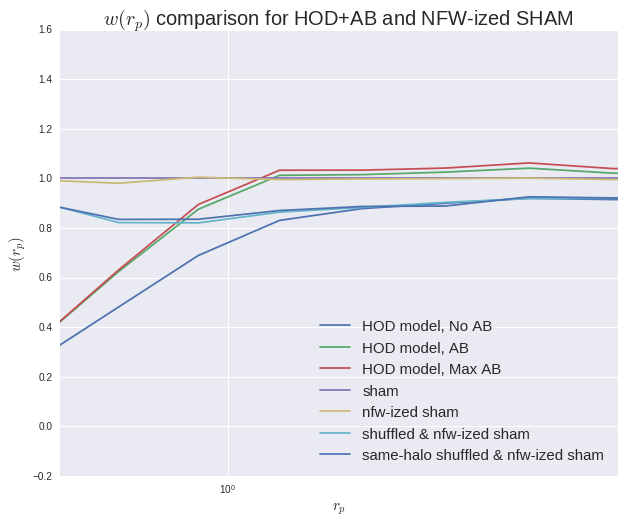

In [19]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp_2h/sham_wp_2h, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab_2h/sham_wp_2h, label = 'HOD model, AB')
plt.plot(bin_centers, mock_wp_max_ab_2h/sham_wp_2h, label = 'HOD model, Max AB')
plt.plot(bin_centers, sham_wp_2h/sham_wp_2h, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp_2h/sham_wp_2h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_shuffled_wp_2h/sham_wp_2h, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_2h/sham_wp_2h, label = 'same-halo shuffled & nfw-ized sham')

#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([5e-1, 5e0]);
#plt.ylim([1,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$w(r_p)$',fontsize = 15)
plt.title(r'$w(r_p)$ comparison for HOD+AB and NFW-ized SHAM', fontsize = 20)

In [20]:
print sham_wp
print sham_shuffled_wp

[  3.05962327e+03   1.51733602e+03   8.84118437e+02   5.10447582e+02
   2.33658760e+02   1.11188314e+02   5.02852205e+01   2.35196619e+01
   1.10573221e+01   5.59306545e+00   3.14374543e+00   1.78636202e+00
   9.85313022e-01   5.24776983e-01   2.78489463e-01   1.34953491e-01
   6.02208621e-02]
[  4.72672254e+03   2.19088357e+03   1.05656885e+03   4.95816619e+02
   2.35039105e+02   1.04347131e+02   4.54572625e+01   1.93362687e+01
   9.07656113e+00   4.83276737e+00   2.77662090e+00   1.61425050e+00
   9.05548686e-01   4.82790077e-01   2.57759323e-01   1.26646809e-01
   5.71294614e-02]


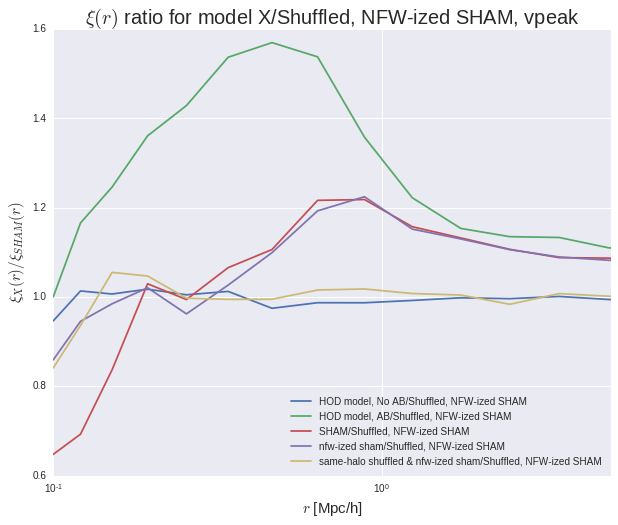

In [21]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp/sham_shuffled_wp, label = 'HOD model, No AB/Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, mock_wp_ab/sham_shuffled_wp, label = 'HOD model, AB/Shuffled, NFW-ized SHAM')
#plt.plot(bin_centers, mock_wp_max_ab/sham_shuffled_wp, label = 'HOD model, Max AB/Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_wp/sham_shuffled_wp, label = 'SHAM/Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_nfw_wp/sham_shuffled_wp, label = 'nfw-ized sham/Shuffled, NFW-ized SHAM')
#plt.plot(bin_centers, sham_shuffled_wp/sham_shuffled_wp, label = 'shuffled & nfw-ized sham/Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_sh_shuffled_wp/sham_shuffled_wp, label = 'same-halo shuffled & nfw-ized sham/Shuffled, NFW-ized SHAM')
#plt.plot(bin_centers, sham_sh_shuffled_cen_wp/sham_shuffled_wp, label = 'same-halo shuffled cen & nfw-ized sham/Shuffled, NFW-ized SHAM')
#plt.plot(bin_centers, sham_sh_shuffled_sat_wp/sham_shuffled_wp, label = 'same-halo shuffled sat & nfw-ized sham/Shuffled, NFW-ized SHAM')

plt.xscale('log')
plt.legend(loc='best')
plt.xlim([1e-1, 5e0]);
#plt.ylim([0.75,1.25]);
plt.xlabel(r'$r$ [Mpc/h]',fontsize = 15)
plt.ylabel(r'$\xi_{X}(r)/\xi_{SHAM}(r)$',fontsize = 15)
plt.title(r'$\xi (r)$ ratio for model X/Shuffled, NFW-ized SHAM, %s'%mag_type, fontsize = 20)

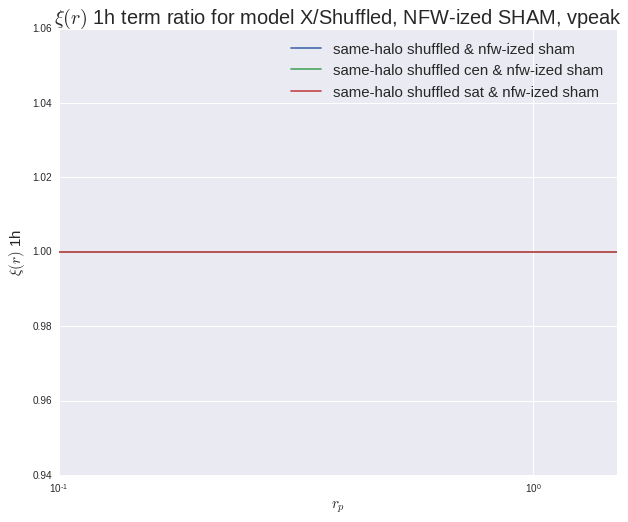

In [22]:
plt.figure(figsize=(10,8))
#plt.plot(bin_centers, mock_wp_1h/sham_shuffled_wp_1h, label = 'HOD model, No AB')
#plt.plot(bin_centers, mock_wp_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, AB')
#plt.plot(bin_centers, mock_wp_max_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, Max AB')
#plt.plot(bin_centers, sham_shuffled_wp_1h/sham_shuffled_wp_1h, label = 'shuffled & nfw-ized sham')
#plt.plot(bin_centers, sham_wp_1h/sham_shuffled_wp_1h, label = 'sham')
#plt.plot(bin_centers, sham_nfw_wp_1h/sham_shuffled_wp_1h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_1h/sham_shuffled_wp_1h, label = 'same-halo shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_cen_wp_1h/sham_shuffled_wp_1h, label = 'same-halo shuffled cen & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_sat_wp_1h/sham_shuffled_wp_1h, label = 'same-halo shuffled sat & nfw-ized sham')

#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 1.5e0]);
#plt.ylim([0.95,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$\xi (r)$ 1h',fontsize = 15)
plt.title(r'$\xi (r)$ 1h term ratio for model X/Shuffled, NFW-ized SHAM, %s'%mag_type, fontsize = 20)

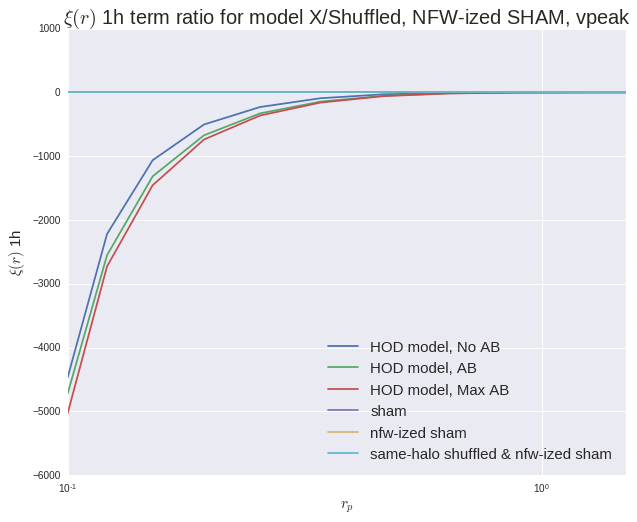

In [23]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp_1h/sham_shuffled_wp_1h, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, AB')
plt.plot(bin_centers, mock_wp_max_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, Max AB')
#plt.plot(bin_centers, mock_wp_max_cen_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, Max Cen AB')
#plt.plot(bin_centers, mock_wp_max_sat_ab_1h/sham_shuffled_wp_1h, label = 'HOD model, Max Sat AB')
#plt.plot(bin_centers, sham_shuffled_wp_1h/sham_shuffled_wp_1h, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_wp_1h/sham_shuffled_wp_1h, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp_1h/sham_shuffled_wp_1h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_1h/sham_shuffled_wp_1h, label = 'same-halo shuffled & nfw-ized sham')

#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 1.5e0]);
#plt.ylim([0.95,1500])
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$\xi (r)$ 1h',fontsize = 15)
plt.title(r'$\xi (r)$ 1h term ratio for model X/Shuffled, NFW-ized SHAM, %s'%mag_type, fontsize = 20)

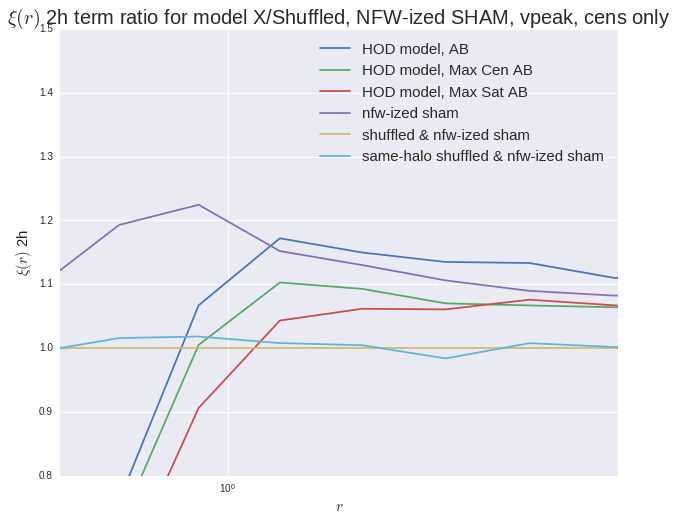

In [24]:
plt.figure(figsize=(10,8))
#plt.plot(bin_centers, mock_wp_2h/sham_shuffled_wp_2h, label = 'HOD model, No AB')
plt.plot(bin_centers, mock_wp_ab_2h/sham_shuffled_wp_2h, label = 'HOD model, AB')
#plt.plot(bin_centers, mock_wp_max_ab_2h/sham_shuffled_wp_2h, label = 'HOD model, Max AB')
plt.plot(bin_centers, mock_wp_max_cen_ab_2h/sham_shuffled_wp_2h, label = 'HOD model, Max Cen AB')
plt.plot(bin_centers, mock_wp_max_sat_ab_2h/sham_shuffled_wp_2h, label = 'HOD model, Max Sat AB')
#plt.plot(bin_centers, sham_wp_2h/sham_shuffled_wp_2h, label = 'sham')
plt.plot(bin_centers, sham_nfw_wp_2h/sham_shuffled_wp_2h, label = 'nfw-ized sham')
plt.plot(bin_centers, sham_shuffled_wp_2h/sham_shuffled_wp_2h, label = 'shuffled & nfw-ized sham')
plt.plot(bin_centers, sham_sh_shuffled_wp_2h/sham_shuffled_wp_2h, label = 'same-halo shuffled & nfw-ized sham')
#plt.plot(bin_centers, sham_sh_shuffled_cen_wp_2h/sham_shuffled_wp_2h, label = 'same-halo shuffled cen & nfw-ized sham')
#plt.plot(bin_centers, sham_sh_shuffled_sat_wp_2h/sham_shuffled_wp_2h, label = 'same-halo shuffled sat & nfw-ized sham')

#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([5e-1, 5e0]);
plt.ylim([0.8,1.5])
plt.xlabel(r'$r$',fontsize = 15)
plt.ylabel(r'$\xi (r)$ 2h',fontsize = 15)
plt.title(r'$\xi (r)$ 2h term ratio for model X/Shuffled, NFW-ized SHAM, %s, cens only'%mag_type, fontsize = 20)

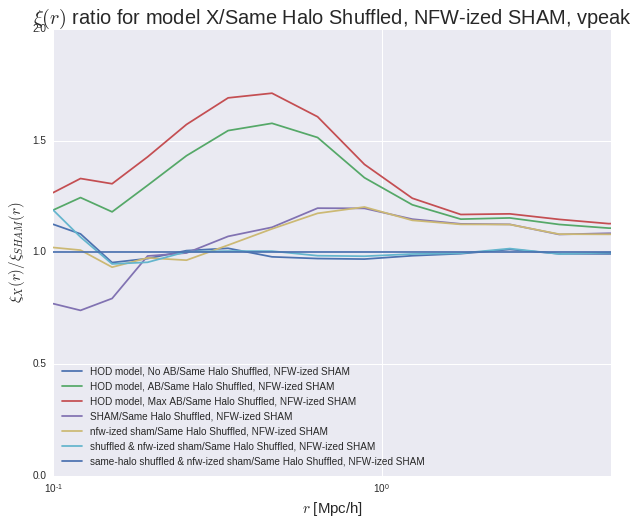

In [25]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, mock_wp/sham_sh_shuffled_wp, label = 'HOD model, No AB/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, mock_wp_ab/sham_sh_shuffled_wp, label = 'HOD model, AB/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, mock_wp_max_ab/sham_sh_shuffled_wp, label = 'HOD model, Max AB/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_wp/sham_sh_shuffled_wp, label = 'SHAM/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_nfw_wp/sham_sh_shuffled_wp, label = 'nfw-ized sham/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_shuffled_wp/sham_sh_shuffled_wp, label = 'shuffled & nfw-ized sham/Same Halo Shuffled, NFW-ized SHAM')
plt.plot(bin_centers, sham_sh_shuffled_wp/sham_sh_shuffled_wp, label = 'same-halo shuffled & nfw-ized sham/Same Halo Shuffled, NFW-ized SHAM')

plt.xscale('log')
plt.legend(loc='best')
plt.xlim([1e-1, 5e0]);
plt.ylim([0.0,2.0]);
plt.xlabel(r'$r$ [Mpc/h]',fontsize = 15)
plt.ylabel(r'$\xi_{X}(r)/\xi_{SHAM}(r)$',fontsize = 15)
plt.title(r'$\xi (r)$ ratio for model X/Same Halo Shuffled, NFW-ized SHAM, %s'%mag_type, fontsize = 20)

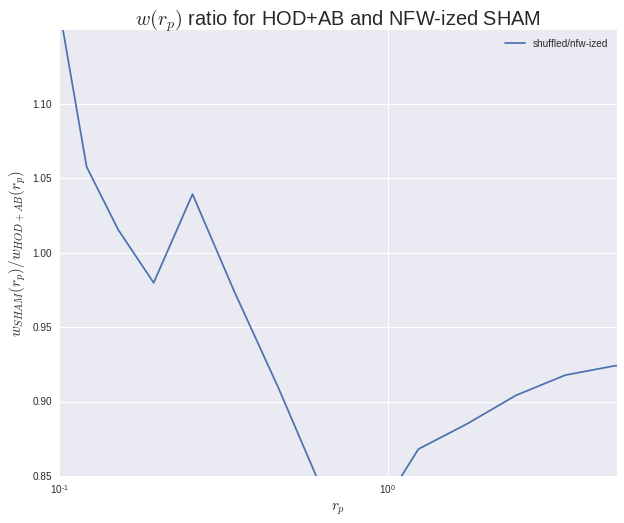

In [26]:
plt.figure(figsize=(10,8))
plt.plot(bin_centers, sham_shuffled_wp/sham_nfw_wp, label = 'shuffled/nfw-ized')
#plt.plot(bin_centers, sham_wp/mock_wp, label = 'sham/model')
#plt.plot(bin_centers, sham_nfw_wp/mock_wp, label = 'nfw-ized sham/model')
#plt.plot(bin_centers, sham_shuffled_wp/mock_wp, label = 'shuffled & nfw-ized sham/model')
plt.xscale('log')
plt.legend(loc='best')
plt.xlim([1e-1, 5e0]);
plt.ylim([0.85,1.15]);
plt.xlabel(r'$r_p$',fontsize = 15)
plt.ylabel(r'$w_{SHAM}(r_p)/w_{HOD+AB}(r_p)$',fontsize = 15)
plt.title(r'$w(r_p)$ ratio for HOD+AB and NFW-ized SHAM', fontsize = 20)

In [27]:
cat.model.param_dict['mean_occupation_centrals_assembias_param1'] = 0.0
cat.model.param_dict['mean_occupation_satellites_assembias_param1'] = 0.0
cat.model.param_dict['mean_occupation_centrals_assembias_slope1'] = 3.0
cat.model.param_dict['mean_occupation_satellites_assembias_slope1'] = 3.0
mock_wps = np.zeros((11,rp_bins.shape[0]-1))
for idx, a in enumerate(np.arange(-1.0,1.2, 0.5)):
    print a
    cat.model.param_dict['mean_occupation_satellites_assembias_param1'] = a
    cat.model.param_dict['mean_occupation_centrals_assembias_param1'] = a
    cat.populate(cat.model.param_dict)
    #mock_pos = np.c_[cat.model.mock.galaxy_table['x'],cat.model.mock.galaxy_table['y'],cat.model.mock.galaxy_table['z']]
    #mock_wp = wp(mock_pos, rp_bins, 40.0 , period=cat.Lbox, num_threads=1)
    mock_wps[idx] = cat.calc_wp(rp_bins, 40.0)

NameError: name 'cat' is not defined

In [ ]:
plt.figure(figsize=(10,10))
for mw, a in zip(mock_wps,np.arange(-1.0,1.2, 0.5)) :
    plt.plot(bin_centers, mw, label = a)
plt.loglog()
plt.legend(loc='best')
plt.ylim([1,1500])
plt.xlim([0.1, 15])

plt.show()

In [ ]:
np.savetxt('cen_hod.npy', cen_hod)
np.savetxt('sat_hod.npy', sat_hod)
np.savetxt('mbc.npy', mbc)

In [ ]:
%%bash
pwd